In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq

from sklearn.preprocessing import StandardScaler

# Specify the path to your Parquet file



file_path = "./data/linearmodel.parquet"

# Read the Parquet file into a pandas DataFrame
df = pd.read_parquet(file_path)
onehot_df = df.iloc[:, [1] + list(range(64-23,64))]
month_embeds = onehot_df.groupby("Month").sum()


Y_true = month_embeds.copy()
# Y_true.reset_index(inplace=True)
# Y_true.drop("Month", axis=1, inplace=True)
Y_true=Y_true[-12:]
Y_true


,Barnet Vale,Brunswick Park,Burnt Oak,Childs Hill,Colindale North,Cricklewood,East Barnet,East Finchley,Edgware,Edgwarebury,...,Golders Green,Hendon,High Barnet,Mill Hill,Totteridge & Woodside,Underhill,West Finchley,West Hendon,Whetstone,Woodhouse
Month,,,,,,,,,,,,,,,,,,,,,
2022-04-01,7,3,4,18,4,4,2,4,8,4,...,8,17,7,9,8,3,5,6,10,4
2022-05-01,7,7,11,25,4,12,7,17,7,3,...,9,18,7,5,6,6,5,7,7,5
2022-06-01,11,4,18,19,4,8,6,9,11,5,...,9,13,5,5,4,5,9,8,6,7
2022-07-01,6,3,7,15,8,5,5,7,11,4,...,15,13,2,9,10,2,6,8,6,5
2022-08-01,3,6,9,18,4,8,2,6,7,4,...,11,4,8,5,4,2,13,13,6,3
2022-09-01,4,9,8,20,6,13,6,12,10,2,...,4,7,6,10,7,2,8,9,8,3
2022-10-01,4,9,12,30,4,11,10,4,15,1,...,10,25,7,8,10,2,14,11,4,8
2022-11-01,5,4,11,32,5,15,5,3,8,5,...,10,18,10,7,13,5,16,11,11,15
2022-12-01,9,5,13,21,6,13,11,6,10,6,...,6,12,0,13,15,3,9,9,10,7


In [41]:
file_path2 = "./data/12months2022-04-01"

# Read the Parquet file into a pandas DataFrame
df2 = pd.read_parquet(file_path2)
Y_pred = df2.copy()
# Y_pred.reset_index(inplace=True)
# Y_pred.drop("index", axis=1, inplace=True)

Y_pred

,Barnet Vale,Brunswick Park,Burnt Oak,Childs Hill,Colindale North,Cricklewood,East Barnet,East Finchley,Edgware,Edgwarebury,...,Golders Green,Hendon,High Barnet,Mill Hill,Totteridge & Woodside,Underhill,West Finchley,West Hendon,Whetstone,Woodhouse
2022-04-01,22.986878,17.237507,13.849126,37.183545,4.553636,14.136941,18.529918,17.658979,13.622858,16.651879,...,25.295317,26.392682,19.838657,27.201383,16.739269,11.792417,28.633863,20.463062,14.224969,20.800283
2022-05-01,17.675150,16.387624,7.622046,28.677311,6.873156,22.087327,12.240513,13.472589,7.447215,11.530882,...,24.621285,31.722049,15.822389,20.753193,9.955378,13.707571,22.186097,16.694985,15.537947,11.225184
2022-06-01,23.017529,16.345647,9.712813,35.011547,8.889391,22.153813,17.359212,9.915505,7.924754,7.588159,...,17.377969,28.747407,19.328937,18.910680,11.893663,14.775940,17.227597,15.559697,13.128223,7.725280
2022-07-01,17.523929,18.987779,14.845064,37.722367,10.834609,12.364268,18.749935,12.527874,12.575526,10.218851,...,18.473510,15.995666,15.468826,12.944552,14.327543,11.217531,15.199717,11.950809,10.683622,11.459996
2022-08-01,10.856185,11.169361,16.483984,31.995886,8.701614,8.654817,13.584830,16.471477,10.022851,9.278880,...,24.373007,12.690391,8.173097,11.333790,12.392010,6.359067,16.422705,11.586055,8.894880,14.704389
2022-09-01,7.283525,9.004179,16.765994,21.768612,6.454874,9.844436,13.180832,10.075059,9.623387,6.194294,...,24.300527,19.529257,11.234669,13.708424,10.152147,2.432085,20.792426,18.964801,9.096419,12.346287
2022-10-01,14.347524,11.811779,13.193639,17.899743,2.757321,13.680339,15.800783,6.812659,15.911778,6.467508,...,17.720644,24.593462,13.427125,15.707216,9.796893,4.893704,16.781565,16.119482,9.343750,9.328348
2022-11-01,23.193290,15.940769,11.053034,13.550572,3.658323,18.443425,23.769264,6.983283,14.338969,5.799903,...,17.379220,20.711277,14.802512,16.221171,10.276570,10.114365,15.722391,18.880199,10.505510,10.015533
2022-12-01,25.817105,18.850381,12.940552,23.443724,4.766604,18.923712,22.371773,17.608186,14.147035,9.954279,...,12.985556,20.821793,18.015821,19.991718,17.061730,13.179893,14.091956,23.351942,11.198826,15.665494
2023-01-01,20.090794,26.740608,11.757186,31.821508,4.339592,19.890490,15.051078,18.322800,24.823620,18.410333,...,8.918656,19.385820,16.119367,17.397228,13.961794,12.877517,23.461314,23.213693,18.891179,14.750636


In [42]:
from sklearn.metrics import r2_score
r2_score(Y_true, Y_pred)
# from sklearn.metrics import mean_squared_error
# mean_squared_error(Y_true,Y_pred)
# from sklearn.metrics import mean_absolute_percentage_error
# mean_absolute_percentage_error(Y_true, Y_pred)

-11.410493302295453

<Axes: >

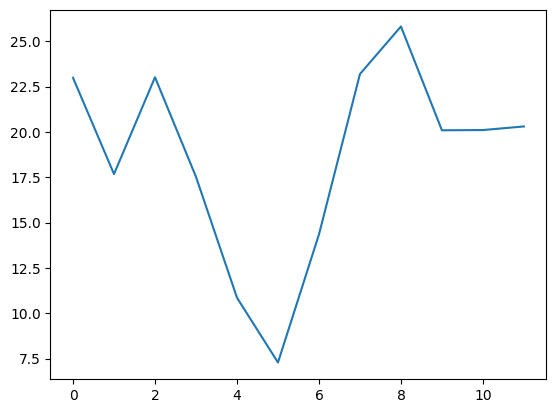

In [39]:
Y_pred['Barnet Vale'].plot()


<Axes: xlabel='Month'>

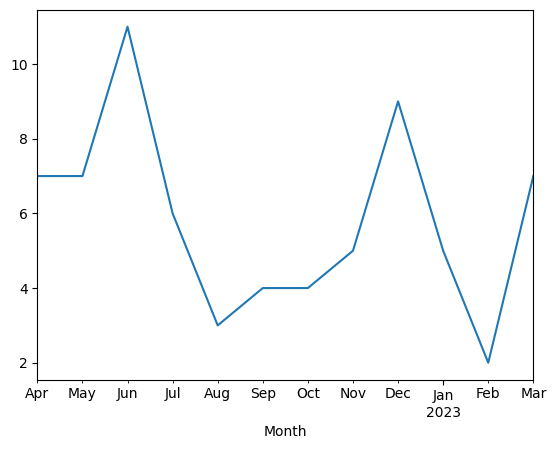

In [40]:
Y_true['Barnet Vale'].plot()

In [62]:
df_plot = month_embeds.copy()
df_plot.reset_index(inplace=True)

df_plot['Month'] = pd.to_datetime(df_plot['Month'])

# Extract the month from the 'Date' column
df_plot['Mon'] = df_plot['Month'].dt.month
df_plot=df_plot.groupby("Mon").mean()
df_plot.drop("Month", axis=1, inplace=True)
df_plot


,Barnet Vale,Brunswick Park,Burnt Oak,Childs Hill,Colindale North,Cricklewood,East Barnet,East Finchley,Edgware,Edgwarebury,...,Golders Green,Hendon,High Barnet,Mill Hill,Totteridge & Woodside,Underhill,West Finchley,West Hendon,Whetstone,Woodhouse
Mon,,,,,,,,,,,,,,,,,,,,,
1,14.307692,14.384615,16.076923,22.000000,6.384615,10.153846,14.000000,10.307692,13.538462,8.846154,...,16.307692,21.000000,12.307692,17.461538,10.000000,10.000000,19.384615,14.692308,9.692308,10.538462
2,12.615385,15.076923,13.769231,21.538462,4.846154,12.461538,12.461538,11.538462,12.384615,8.615385,...,13.461538,18.153846,9.769231,12.230769,10.000000,7.230769,17.307692,15.000000,9.461538,10.000000
3,12.923077,13.384615,15.538462,22.846154,5.769231,11.769231,12.692308,10.769231,13.076923,8.230769,...,17.230769,19.538462,10.000000,14.769231,9.923077,9.153846,19.923077,17.538462,11.307692,10.692308
4,9.833333,10.416667,15.166667,20.166667,5.916667,10.333333,10.750000,9.333333,10.833333,7.166667,...,13.916667,18.583333,9.166667,11.666667,8.916667,8.333333,14.000000,14.500000,8.333333,10.083333
5,14.166667,10.833333,12.750000,20.333333,5.166667,10.583333,12.250000,11.000000,9.250000,7.000000,...,13.750000,17.000000,10.583333,11.250000,7.250000,8.166667,13.333333,16.000000,8.750000,8.666667
6,12.000000,9.250000,11.583333,21.333333,4.333333,10.333333,11.500000,9.583333,10.500000,5.916667,...,14.083333,18.666667,10.083333,11.750000,9.250000,7.333333,14.333333,12.750000,9.166667,10.416667
7,9.916667,8.416667,12.666667,19.916667,7.000000,9.500000,10.000000,9.083333,9.750000,6.750000,...,12.250000,16.583333,7.583333,11.666667,7.666667,7.833333,13.916667,13.416667,8.333333,9.833333
8,10.916667,9.083333,13.250000,23.166667,6.000000,8.583333,9.500000,9.583333,13.750000,8.000000,...,12.666667,17.166667,10.000000,11.666667,8.166667,6.500000,15.166667,13.083333,8.833333,8.833333
9,10.666667,9.666667,13.416667,18.250000,4.166667,8.916667,11.166667,10.833333,12.500000,6.583333,...,12.166667,18.083333,7.833333,10.250000,7.166667,6.416667,13.000000,15.333333,9.250000,9.333333


In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = month_embeds.sum(axis=1)
df_plot = pd.DataFrame(df_plot, columns=["Amount"])
df_plot.reset_index(inplace=True)

df_plot['Month'] = pd.to_datetime(df_plot['Month'])

df_plot['Mon'] = df_plot['Month'].dt.month

df_plot=df_plot.groupby("Mon").mean()

df_plot.drop("Month", axis=1, inplace=True)




df_plot


,Amount
Mon,
1,322.384615
2,291.615385
3,310.384615
4,263.083333
5,264.333333
6,257.833333
7,252.916667
8,261.166667
9,251.666667


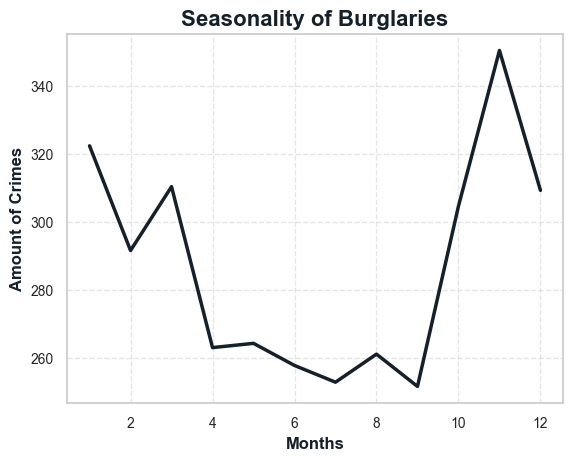

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'x' and 'y'

# Set the style for the plot
sns.set(style="whitegrid", palette="colorblind")

# Create the line plot
sns.lineplot(x="Mon", y="Amount", data=df_plot, linewidth=2.5, color='#15202B')

# Set title and labels
plt.title('Seasonality of Burglaries', fontsize=16, fontweight='bold', color='#15202B')
plt.xlabel('Months', fontsize=12, fontweight='bold', color='#15202B')
plt.ylabel('Amount of Crimes', fontsize=12, fontweight='bold', color='#15202B')

# Customize the tick parameters
plt.tick_params(axis='both', which='major', labelsize=10, width=2, color='#15202B')
plt.tick_params(axis='both', which='minor', labelsize=8, width=2, color='#15202B')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Save the plot
plt.savefig('line_plot_month.png', dpi=600)

# Show the plot
plt.show()


In [153]:
df_bar= month_embeds.copy()
df_bar.reset_index(inplace=True)
df_bar.drop("Month",axis=1,inplace=True)
import pandas as pd


sum_row = df_bar.sum()

# Convert the summed values into a DataFrame
sum_df = pd.DataFrame(sum_row).T

# Display the summed values
sum_df


,Barnet Vale,Brunswick Park,Burnt Oak,Childs Hill,Colindale North,Cricklewood,East Barnet,East Finchley,Edgware,Edgwarebury,...,Golders Green,Hendon,High Barnet,Mill Hill,Totteridge & Woodside,Underhill,West Finchley,West Hendon,Whetstone,Woodhouse
0,1917,1798,2097,3173,797,1579,1809,1607,1854,1163,...,2069,2831,1461,1941,1394,1228,2407,2248,1460,1543


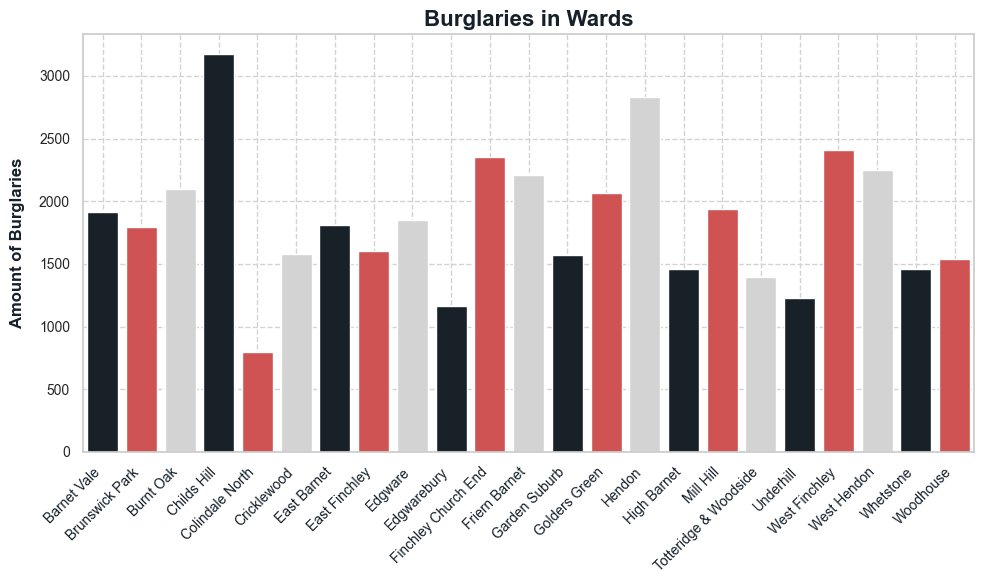

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'crimes_data' with relevant crime data

# Set the style for the plot
sns.set(style="whitegrid")

# Define the color palette
colors = ["#15202B", "#E53E3E", "#D3D3D3"]  # Dark Blue, Red, Gray

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.barplot(data=sum_df, palette=colors)

# Set title and labels
plt.title('Burglaries in Wards', fontsize=16, fontweight='bold', color='#15202B')
plt.xlabel('', fontsize=12, fontweight='bold', color='#15202B')
plt.ylabel('Amount of Burglaries', fontsize=12, fontweight='bold', color='#15202B')

# Customize the tick parameters
plt.tick_params(axis='both', which='major', labelsize=10, width=2, color='#15202B')
plt.tick_params(axis='both', which='minor', labelsize=8, width=2, color='#15202B')

# Rotate x-axis labels if needed and adjust their positioning
plt.xticks(rotation=45, ha='right', color='#15202B')

# Adjust y-axis label to improve spacing
ax.yaxis.labelpad = 10  # Increase or decrease the padding as needed

# Customize the plot background and gridlines
ax.set_facecolor('#FFFFFF')  # White background
ax.grid(color='#D3D3D3', linestyle='--')

# Show the plot
plt.tight_layout()  # Adjust the spacing of the plot elements

plt.savefig('barplot.png', dpi=600)

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

df_year = month_embeds.sum(axis=1)
df_year = pd.DataFrame(df_year, columns=["Amount"])
df_year.reset_index(inplace=True)

df_year['Month'] = pd.to_datetime(df_year['Month'])

df_year['Year'] = df_year['Month'].dt.year



df_year.drop("Month", axis=1, inplace=True)
df_year=df_year.groupby("Year").sum()






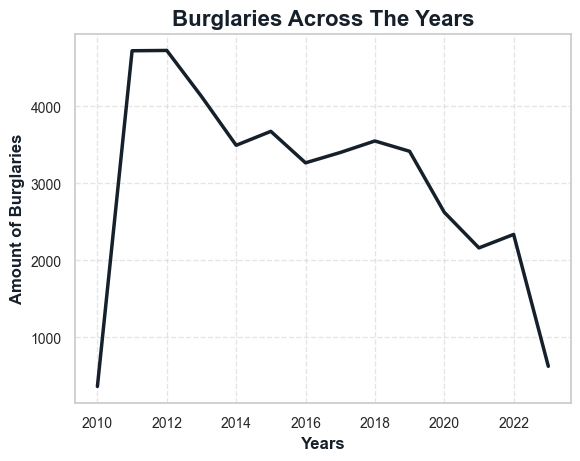

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'x' and 'y'

# Set the style for the plot
sns.set(style="whitegrid", palette="colorblind")

# Create the line plot
sns.lineplot(x="Year", y="Amount", data=df_year, linewidth=2.5, color='#15202B')

# Set title and labels
plt.title('Burglaries Across The Years', fontsize=16, fontweight='bold', color='#15202B')
plt.xlabel('Years', fontsize=12, fontweight='bold', color='#15202B')
plt.ylabel('Amount of Burglaries', fontsize=12, fontweight='bold', color='#15202B')

# Customize the tick parameters
plt.tick_params(axis='both', which='major', labelsize=10, width=2, color='#15202B')
plt.tick_params(axis='both', which='minor', labelsize=8, width=2, color='#15202B')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Save the plot
plt.savefig('lineplot_year.png', dpi=600)

# Show the plot
plt.show()


Neural Prophet

In [3]:
from neuralprophet import NeuralProphet

c:\Users\20211445\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\20211445\AppData\Local\Programs\Python\Python38\lib\site-packages\plotly_resampler\aggregation\aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


In [4]:
df_prophet = month_embeds.copy()
df_prophet.reset_index(inplace=True)
# Assuming you have a DataFrame named 'df' with two columns: 'ds' for the dates and 'y' for the target variable

# Convert the 'ds' column to pandas datetime type
df_prophet['Month'] = pd.to_datetime(df_prophet['Month'])
df_prophet = df_prophet.rename(columns={'Month': 'ds'})

df_prophet


,ds,Barnet Vale,Brunswick Park,Burnt Oak,Childs Hill,Colindale North,Cricklewood,East Barnet,East Finchley,Edgware,...,Golders Green,Hendon,High Barnet,Mill Hill,Totteridge & Woodside,Underhill,West Finchley,West Hendon,Whetstone,Woodhouse
0,2010-12-01,13,13,10,20,7,11,16,18,20,...,13,33,14,25,10,8,27,16,9,10
1,2011-01-01,23,15,14,41,5,13,20,19,12,...,28,29,21,30,17,15,30,19,14,21
2,2011-02-01,20,22,10,24,5,20,12,13,13,...,19,24,15,18,13,5,23,22,15,17
3,2011-03-01,15,13,6,33,8,25,13,14,4,...,30,39,17,23,8,22,22,12,17,6
4,2011-04-01,25,15,16,37,6,28,15,8,9,...,20,33,18,15,16,18,23,15,17,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2022-11-01,5,4,11,32,5,15,5,3,8,...,10,18,10,7,13,5,16,11,11,15
144,2022-12-01,9,5,13,21,6,13,11,6,10,...,6,12,0,13,15,3,9,9,10,7
145,2023-01-01,5,7,11,21,5,13,9,5,10,...,11,15,9,10,15,5,17,11,0,4
146,2023-02-01,2,14,4,21,3,15,5,5,11,...,6,11,7,12,12,2,5,10,3,6


In [6]:

wards = df_prophet.columns[1:]
from neuralprophet import NeuralProphet
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

df_pred=pd.DataFrame()

for ward in wards:
    df_neutral = df_neural =df_prophet[['ds',ward]].copy()
    df_neural=df_neural.rename(columns={ward: 'y'})
    
    m = NeuralProphet()

    # Create train and test datasets
    train_df = df_neural[:-12]  # Use all data except the last 12 months for training
    test_df = df_neural[-12:]   # Use the last 12 months for testing

    
    # Perform standard scaling on the target variable
    scaler = StandardScaler()
    train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))
    
    # Fit the model
    metrics = m.fit(train_df, freq='M')

    # Generate future dates for prediction
    future = m.make_future_dataframe(train_df, periods=12, n_historic_predictions=len(train_df))

    # Perform predictions
    forecast = m.predict(future)
    # Inverse transform the scaled predictions
    forecast['yhat'] = scaler.inverse_transform(forecast['yhat1'].values.reshape(-1, 1))

        # Extract the predicted values
    y_pred = forecast['yhat'].tail(12).values.flatten()

    # Extract the actual values
    y_true = test_df['y'].values.flatten()
    y_pred = forecast['yhat'].tail(12).values.flatten()
    df_pred[ward]=y_pred
    
    df_pred[ward + " true"]=y_true  





WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekl

Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 11847.27it/s, loss=0.0155, v_num=40, MAE=0.537, RMSE=0.681, Loss=0.0156, RegLoss=0.000] 

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 334.26it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekl

Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10811.80it/s, loss=0.0106, v_num=41, MAE=0.521, RMSE=0.644, Loss=0.0105, RegLoss=0.000]   

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.63it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.s

Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10718.51it/s, loss=0.0196, v_num=42, MAE=0.649, RMSE=0.826, Loss=0.0196, RegLoss=0.000] 


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.75it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 228.18it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10004.21it/s, loss=0.0167, v_num=43, MAE=0.607, RMSE=0.748, Loss=0.0173, RegLoss=0.000] 

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.50it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 213.17it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10611.79it/s, loss=0.0272, v_num=44, MAE=0.686, RMSE=0.896, Loss=0.0278, RegLoss=0.000] 


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 201.31it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 217.83it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 9995.98it/s, loss=0.0176, v_num=45, MAE=0.639, RMSE=0.792, Loss=0.0181, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 334.15it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.


INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 214.26it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 9793.46it/s, loss=0.00945, v_num=46, MAE=0.489, RMSE=0.608, Loss=0.00958, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.65it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:01<00:00, 207.88it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 9187.98it/s, loss=0.0166, v_num=47, MAE=0.660, RMSE=0.821, Loss=0.0163, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 167.08it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekl

Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10010.96it/s, loss=0.0124, v_num=48, MAE=0.562, RMSE=0.699, Loss=0.0122, RegLoss=0.000] 


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 143.24it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekl

Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10229.23it/s, loss=0.0119, v_num=49, MAE=0.634, RMSE=0.753, Loss=0.0123, RegLoss=0.000] 


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 334.29it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 213.84it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 8039.32it/s, loss=0.0151, v_num=50, MAE=0.635, RMSE=0.821, Loss=0.0154, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 252.65it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.s

Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 5923.77it/s, loss=0.00908, v_num=51, MAE=0.461, RMSE=0.587, Loss=0.00974, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 125.36it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.s

Finding best initial lr: 100%|██████████| 209/209 [00:01<00:00, 201.46it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10719.06it/s, loss=0.0216, v_num=52, MAE=0.672, RMSE=0.823, Loss=0.0214, RegLoss=0.000] 


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 334.55it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.s

Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10708.82it/s, loss=0.0174, v_num=53, MAE=0.610, RMSE=0.772, Loss=0.0166, RegLoss=0.000] 


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 167.12it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 224.45it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10469.50it/s, loss=0.0189, v_num=54, MAE=0.706, RMSE=0.863, Loss=0.0199, RegLoss=0.000] 

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.51it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.


INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 221.99it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10474.21it/s, loss=0.0135, v_num=55, MAE=0.604, RMSE=0.738, Loss=0.0129, RegLoss=0.000] 

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.63it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 217.91it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10231.29it/s, loss=0.0127, v_num=56, MAE=0.544, RMSE=0.683, Loss=0.0127, RegLoss=0.000] 


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.56it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.s

Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 9787.04it/s, loss=0.0109, v_num=57, MAE=0.566, RMSE=0.724, Loss=0.0108, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 167.06it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 214.83it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10710.83it/s, loss=0.0166, v_num=58, MAE=0.630, RMSE=0.765, Loss=0.0171, RegLoss=0.000] 

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.69it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.s

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 227.76it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 9988.03it/s, loss=0.0113, v_num=59, MAE=0.511, RMSE=0.673, Loss=0.012, RegLoss=0.000]   

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.84it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:01<00:00, 199.85it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10469.79it/s, loss=0.014, v_num=60, MAE=0.577, RMSE=0.713, Loss=0.0145, RegLoss=0.000]  


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.52it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.s

Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10231.57it/s, loss=0.0162, v_num=61, MAE=0.614, RMSE=0.752, Loss=0.0167, RegLoss=0.000] 

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 167.17it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\2544630692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.


INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 227.66it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10469.55it/s, loss=0.0131, v_num=62, MAE=0.542, RMSE=0.685, Loss=0.013, RegLoss=0.000]  


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.72it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [25]:
from neuralprophet import NeuralProphet
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

wards = df_prophet.columns[1:]
df_pred2 = pd.DataFrame()

for ward in wards:
    df_neural = df_prophet[['ds', ward]].copy()
    df_neural = df_neural.rename(columns={ward: 'y'})

    m = NeuralProphet(
        n_changepoints=10,  # Set the number of changepoints
        yearly_seasonality='auto',  # Enable or disable yearly seasonality
        weekly_seasonality='auto',  # Enable or disable weekly seasonality
        daily_seasonality='auto'  # Enable or disable daily seasonality
    )

    # Create train and test datasets
    train_df = df_neural[:-12]  # Use all data except the last 12 months for training
    test_df = df_neural[-12:]   # Use the last 12 months for testing

    # Perform standard scaling on the target variable
    scaler = StandardScaler()
    train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

    # Fit the model
    m.fit(train_df, freq='M')

    # Generate future dates for prediction
    future = m.make_future_dataframe(train_df, periods=12, n_historic_predictions=len(train_df))

    # Perform predictions
    forecast = m.predict(future)

    # Inverse transform the scaled predictions
    forecast['yhat'] = scaler.inverse_transform(forecast['yhat1'].values.reshape(-1, 1))

    # Extract the predicted values
    y_pred = forecast['yhat'].tail(12).values.flatten()

    # Extract the actual values
    y_true = test_df['y'].values.flatten()

    df_pred2[ward] = y_pred
    df_pred2[ward + " true"] = y_true

    # Calculate and print the R2 score for the prediction
    r2 = r2_score(y_true, y_pred)
    print(f"R2 Score for {ward}: {r2}")


WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly

Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10719.00it/s, loss=0.0146, v_num=63, MAE=0.536, RMSE=0.680, Loss=0.0153, RegLoss=0.000] 

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.36it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.



R2 Score for Barnet Vale: -2.316313363022453


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 236.50it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10718.76it/s, loss=0.0101, v_num=64, MAE=0.512, RMSE=0.626, Loss=0.010, RegLoss=0.000]    

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.75it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.se


R2 Score for Brunswick Park: -0.557695949914875


INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 246.52it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10003.73it/s, loss=0.0184, v_num=65, MAE=0.633, RMSE=0.817, Loss=0.0189, RegLoss=0.000] 

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.55it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS



R2 Score for Burnt Oak: -0.9086381481627208


INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 224.13it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 9625.37it/s, loss=0.0163, v_num=66, MAE=0.594, RMSE=0.739, Loss=0.0167, RegLoss=0.000]  


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 334.29it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.



R2 Score for Childs Hill: -6.85964380617141


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 216.49it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 9996.83it/s, loss=0.0271, v_num=67, MAE=0.681, RMSE=0.898, Loss=0.0274, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.59it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.



R2 Score for Colindale North: -0.1146452015004995


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 219.43it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 9996.88it/s, loss=0.0176, v_num=68, MAE=0.622, RMSE=0.784, Loss=0.0176, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 143.25it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.



R2 Score for Cricklewood: -2.100912599355705


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:01<00:00, 203.25it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10004.00it/s, loss=0.00906, v_num=69, MAE=0.484, RMSE=0.595, Loss=0.00922, RegLoss=0.000] 

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 167.04it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS



R2 Score for East Barnet: -1.0046462889960681


INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 225.16it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 9999.38it/s, loss=0.0162, v_num=70, MAE=0.668, RMSE=0.845, Loss=0.0175, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.60it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS



R2 Score for East Finchley: -0.4366723547816882


INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 219.88it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 9670.95it/s, loss=0.0127, v_num=71, MAE=0.567, RMSE=0.736, Loss=0.0125, RegLoss=0.000]  


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 167.13it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.



R2 Score for Edgware: -1.2475356342891222


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 212.96it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10231.57it/s, loss=0.0124, v_num=72, MAE=0.627, RMSE=0.742, Loss=0.0121, RegLoss=0.000] 

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.57it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column



R2 Score for Edgwarebury: -4.551601855429313


WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly

Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 9379.49it/s, loss=0.0156, v_num=73, MAE=0.635, RMSE=0.812, Loss=0.0153, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.72it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly

R2 Score for Finchley Church End: -0.07955452638435667


INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:01<00:00, 193.50it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 7898.55it/s, loss=0.00935, v_num=74, MAE=0.451, RMSE=0.580, Loss=0.00926, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 167.10it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.



R2 Score for Friern Barnet: -1.1120646133571759


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:01<00:00, 183.82it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 9187.31it/s, loss=0.0206, v_num=75, MAE=0.670, RMSE=0.823, Loss=0.0215, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.64it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.



R2 Score for Garden Suburb: -0.8899592156722715


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:01<00:00, 192.96it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 3783.26it/s, loss=0.0172, v_num=76, MAE=0.617, RMSE=0.772, Loss=0.0171, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 100.29it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.se


R2 Score for Golders Green: -1.2925773145520054


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:02<00:00, 81.51it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 9568.25it/s, loss=0.0183, v_num=77, MAE=0.683, RMSE=0.840, Loss=0.0186, RegLoss=0.000]  


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.62it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.



R2 Score for Hendon: -0.1351387202280836


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 211.44it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 9998.74it/s, loss=0.0131, v_num=78, MAE=0.600, RMSE=0.728, Loss=0.0128, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.65it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.



R2 Score for High Barnet: -0.6973391677944065


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 222.10it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10461.82it/s, loss=0.0124, v_num=79, MAE=0.546, RMSE=0.685, Loss=0.0128, RegLoss=0.000] 

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 167.14it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS



R2 Score for Mill Hill: -1.3681779925321789


INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 221.02it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 9787.86it/s, loss=0.0119, v_num=80, MAE=0.562, RMSE=0.723, Loss=0.0107, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 168.06it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS



R2 Score for Totteridge & Woodside: -3.556242413155829


INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:01<00:00, 208.09it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10239.35it/s, loss=0.0167, v_num=81, MAE=0.630, RMSE=0.763, Loss=0.0169, RegLoss=0.000] 

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.99it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.


R2 Score for Underhill: -8.884861674828366


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 230.21it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 10469.21it/s, loss=0.012, v_num=82, MAE=0.520, RMSE=0.683, Loss=0.0123, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.58it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.



R2 Score for West Finchley: 0.30670885417298155


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 222.90it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 9787.15it/s, loss=0.0139, v_num=83, MAE=0.563, RMSE=0.692, Loss=0.0138, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.72it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS



R2 Score for West Hendon: -7.176470535951934


INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:00<00:00, 228.78it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 8494.52it/s, loss=0.0154, v_num=84, MAE=0.607, RMSE=0.744, Loss=0.0157, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.49it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\20211445\AppData\Local\Temp\ipykernel_7180\971183299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df['y'].values.reshape(-1, 1))

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.



R2 Score for Whetstone: -1.3340178737224315


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 449
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:01<00:00, 185.12it/s]


Epoch 449: 100%|██████████| 449/449 [00:00<00:00, 8886.36it/s, loss=0.0128, v_num=85, MAE=0.547, RMSE=0.691, Loss=0.0131, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.265]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.324]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.36it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column



R2 Score for Woodhouse: -0.36461601890278716


In [14]:
df_pred

,Barnet Vale,Barnet Vale true,Brunswick Park,Brunswick Park true,Burnt Oak,Burnt Oak true,Childs Hill,Childs Hill true,Colindale North,Colindale North true,...,Underhill,Underhill true,West Finchley,West Finchley true,West Hendon,West Hendon true,Whetstone,Whetstone true,Woodhouse,Woodhouse true
0,0.288239,7,3.503215,3,10.481247,4,8.766932,18,5.926234,4,...,-0.502593,3,8.004206,5,4.852575,6,1.093791,10,3.386357,4
1,4.662315,7,3.250648,7,5.897542,11,7.887985,25,5.051756,4,...,-1.037644,6,5.922716,5,6.722033,7,2.476298,7,1.915616,5
2,1.752704,11,2.337944,4,4.789963,18,9.494211,19,4.074371,4,...,-2.303606,5,7.805750,9,3.028486,8,2.209645,6,3.160411,7
3,0.280353,6,1.611660,3,5.646634,7,9.179805,15,6.695085,8,...,-1.330299,2,7.074684,6,3.708023,8,1.973149,6,2.841393,5
4,1.204289,3,2.206275,6,6.815110,9,12.456849,18,6.471677,4,...,-2.499101,2,8.120335,13,2.176328,13,1.491369,6,1.575487,3
5,0.893230,4,2.211996,9,6.592595,8,7.232060,20,3.976308,6,...,-2.938816,2,6.173803,8,4.698193,9,2.258126,8,2.673272,3
6,3.113801,4,7.699940,9,6.616300,12,6.804306,30,4.249165,4,...,-0.034059,2,10.432097,14,3.937247,11,2.957571,4,3.716599,8
7,6.053725,5,9.602265,4,9.196469,11,14.120847,32,5.607444,5,...,0.281648,5,12.505412,16,7.988600,11,7.966235,11,7.855492,15
8,5.887160,9,5.256741,5,9.906793,13,8.145532,21,5.345204,6,...,-0.680194,3,9.726373,9,4.651284,9,2.059983,10,2.188405,7
9,2.439546,5,6.970779,7,8.922925,11,8.466866,21,6.355162,5,...,-0.602649,5,10.375956,17,3.586378,11,2.566356,0,2.529852,4


In [22]:
import pandas as pd
from sklearn.metrics import r2_score

# Assuming you have a DataFrame named 'df' with columns 'column1', 'column2', 'column3', 'column4', ...

# Get the list of column names
column_names = df_pred.columns.tolist()


# Create an empty list to store the R2 scores
r2_scores = []

# Iterate through the columns in pairs
for i in range(0, len(column_names), 2):
    # Get the current pair of column names
    col1 = column_names[i]
    col2 = column_names[i+1]

    # Extract the values of the two columns
    y_true = df_pred[col2].values
    y_pred = df_pred[col1].values

    # Calculate the R2 score
    r2 = r2_score(y_true, y_pred)

    # Append the R2 score to the list
    r2_scores.append(r2)

# Print the R2 scores


r2_scores



[-2.2365286364497527,
 -0.5702538215106407,
 -0.9403106441898175,
 -6.880107447595273,
 -0.125672621963135,
 -2.187550620502627,
 -1.0149361813705684,
 -0.44643774137922376,
 -1.255305466807295,
 -4.754798351050797,
 -0.10588482863817594,
 -1.0762077134528432,
 -0.8097507277648923,
 -1.3115713219772074,
 -0.11483016757256714,
 -0.7342739405381775,
 -1.3687995349745865,
 -3.5385510500100237,
 -8.334012329556627,
 0.3512750672453968,
 -7.410890433967998,
 -1.333911726766444,
 -0.4010471238770046]

In [18]:
lista=df_pred['Barnet Vale']
lista2=df_pred['Barnet Vale true']
r2_score(lista2,lista)


-2.2365286364497527

['Barnet Vale',
 'Barnet Vale true',
 'Brunswick Park',
 'Brunswick Park true',
 'Burnt Oak',
 'Burnt Oak true',
 'Childs Hill',
 'Childs Hill true',
 'Colindale North',
 'Colindale North true',
 'Cricklewood',
 'Cricklewood true',
 'East Barnet',
 'East Barnet true',
 'East Finchley',
 'East Finchley true',
 'Edgware',
 'Edgware true',
 'Edgwarebury',
 'Edgwarebury true',
 'Finchley Church End',
 'Finchley Church End true',
 'Friern Barnet',
 'Friern Barnet true',
 'Garden Suburb',
 'Garden Suburb true',
 'Golders Green',
 'Golders Green true',
 'Hendon',
 'Hendon true',
 'High Barnet',
 'High Barnet true',
 'Mill Hill',
 'Mill Hill true',
 'Totteridge & Woodside',
 'Totteridge & Woodside true',
 'Underhill',
 'Underhill true',
 'West Finchley',
 'West Finchley true',
 'West Hendon',
 'West Hendon true',
 'Whetstone',
 'Whetstone true',
 'Woodhouse',
 'Woodhouse true']